<a href="https://colab.research.google.com/github/Sandymyatnoe/Sandymyatnoe/blob/main/custom_data_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

torch.__version__

'2.4.0+cu121'

In [2]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
import requests
import zipfile
from pathlib import Path

data_path=Path("data/")
image_path=data_path/"pho_ramen_hamburger"

image_path.mkdir(parents=True, exist_ok=True)

with open(data_path/"pho_ramen_humburger_10_percent.zip", "wb") as f:
  request=requests.get("https://github.com/Sandymyatnoe/Sandymyatnoe/raw/main/pho_ramen_hamburger_10_percent.zip")
  f.write(request.content)

with zipfile.ZipFile(data_path/"pho_ramen_humburger_10_percent.zip", "r") as zip_ref:
  zip_ref.extractall(image_path)

In [4]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"Ther are {len(dirnames)} directories and {len(filenames)} images in {dir_path}.")

In [5]:
walk_through_dir(image_path)

Ther are 2 directories and 0 images in data/pho_ramen_hamburger.
Ther are 3 directories and 0 images in data/pho_ramen_hamburger.
Ther are 0 directories and 72 images in data/pho_ramen_hamburger.
Ther are 0 directories and 78 images in data/pho_ramen_hamburger.
Ther are 0 directories and 75 images in data/pho_ramen_hamburger.
Ther are 3 directories and 0 images in data/pho_ramen_hamburger.
Ther are 0 directories and 31 images in data/pho_ramen_hamburger.
Ther are 0 directories and 25 images in data/pho_ramen_hamburger.
Ther are 0 directories and 19 images in data/pho_ramen_hamburger.


In [6]:
image_path

PosixPath('data/pho_ramen_hamburger')

In [7]:
train_dir=image_path/"train"
test_dir=image_path/"test"

train_dir, test_dir

(PosixPath('data/pho_ramen_hamburger/train'),
 PosixPath('data/pho_ramen_hamburger/test'))

ramen 512 384


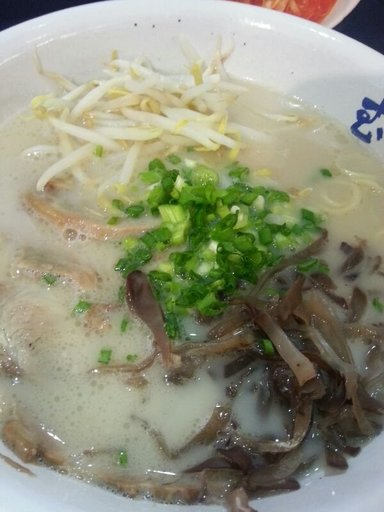

In [8]:
import random
from PIL import Image

random.seed(42)
image_path_list=list(image_path.glob("*/*/*.jpg"))
random_image_path=random.choice(image_path_list)
image_class=random_image_path.parent.stem
img=Image.open(random_image_path)
print(image_class, img.height, img.width)
img

(512, 384, 3)


(-0.5, 383.5, 511.5, -0.5)

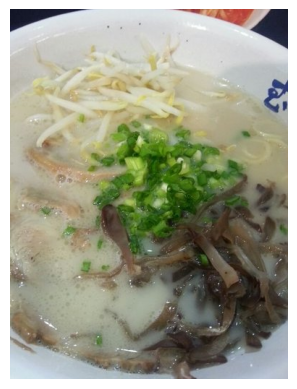

In [9]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array=np.asarray(img)
plt.imshow(img_as_array)
print(img_as_array.shape)
plt.axis(False)

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [11]:
data_transform=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
    ])

In [12]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  random.seed(seed)
  random_image_paths=random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig , ax=plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\n Size:{f.size}")
      ax[0].axis(False)

      transformed_image=transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \n Size:{transformed_image.shape}")
      ax[0].axis(False)


      fig.suptitle(f"Class:{image_path.parent.stem}", fontsize=16)



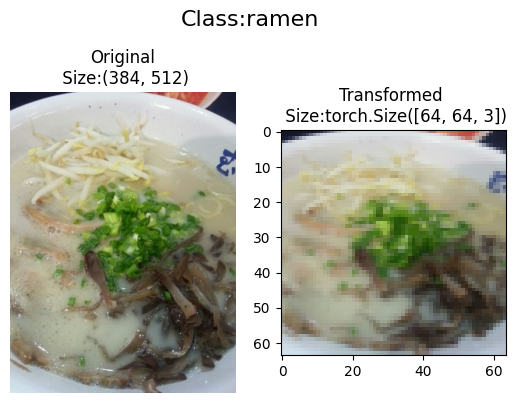

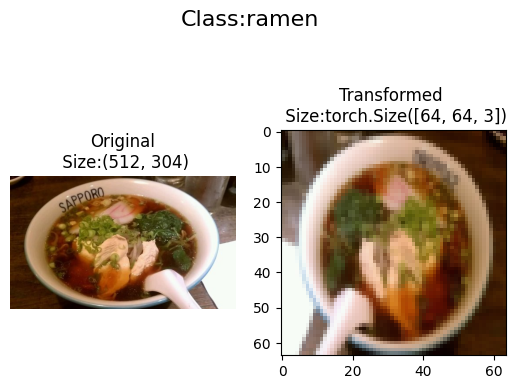

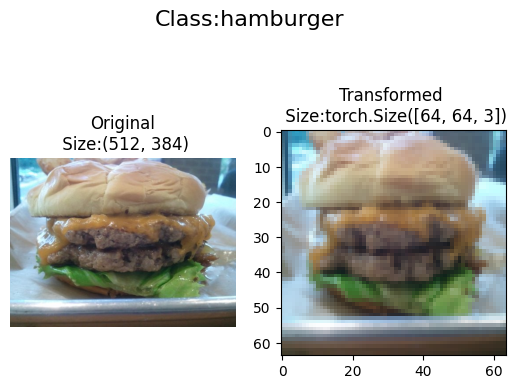

In [13]:
plot_transformed_images(image_path_list, transform=data_transform, n=3)

In [14]:
train_data=datasets.ImageFolder(root=train_dir,
                                transform=data_transform,
                                target_transform=None)

test_data=datasets.ImageFolder(root=test_dir,
                               transform=data_transform)


train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pho_ramen_hamburger/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pho_ramen_hamburger/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [15]:
class_names=train_data.classes
class_names

['hamburger', 'pho', 'ramen']

In [16]:
class_dict=train_data.class_to_idx
class_dict

{'hamburger': 0, 'pho': 1, 'ramen': 2}

In [17]:
len(train_data), len(test_data)

(225, 75)

In [18]:
img, label= train_data[0][0], train_data[0][1]
img.shape, img.dtype, label, type(label)

(torch.Size([3, 64, 64]), torch.float32, 0, int)

torch.Size([64, 64, 3]) torch.float32


(-0.5, 63.5, 63.5, -0.5)

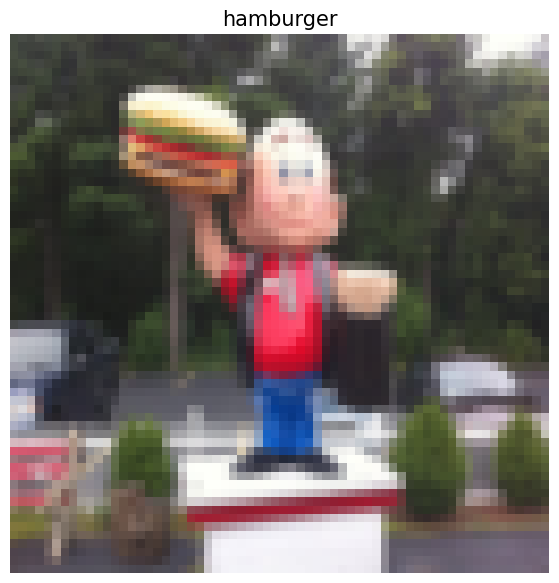

In [19]:
img_permute=img.permute(1,2,0)
print(img_permute.shape, img_permute.dtype)
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.title(class_names[label], fontsize=15)
plt.axis(False)

In [20]:
from torch.utils.data import DataLoader

train_dataloader=DataLoader(dataset=train_data,
                            batch_size=1,
                            num_workers=os.cpu_count(),
                            shuffle=True)

test_dataloader=DataLoader(dataset=test_data,
                           batch_size=1,
                           num_workers=os.cpu_count(),
                           shuffle=False)


train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79ddb5c8bfa0>,
 <torch.utils.data.dataloader.DataLoader at 0x79ddb5c8b790>)

In [21]:
img, label=next(iter(train_dataloader))

img.shape, label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [22]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [23]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List


In [24]:
list(os.scandir(image_path/"train"))

[<DirEntry 'ramen'>, <DirEntry 'hamburger'>, <DirEntry 'pho'>]

In [25]:
target_directory=train_dir

class_names_found=sorted([entry.name for entry in list(os.scandir(train_dir))])
class_names_found

['hamburger', 'pho', 'ramen']

In [26]:
target_directory

PosixPath('data/pho_ramen_hamburger/train')

In [27]:
def find_classes(directory):

  classes=sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

  class_to_idx={cls_name:i for i, cls_name in enumerate(classes)}
  return classes, class_to_idx

In [28]:
find_classes(train_dir)

(['hamburger', 'pho', 'ramen'], {'hamburger': 0, 'pho': 1, 'ramen': 2})

In [29]:
find_classes(test_dir)

(['hamburger', 'pho', 'ramen'], {'hamburger': 0, 'pho': 1, 'ramen': 2})

In [30]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):

  def __init__(self, targ_dir, transform=None):

    self.paths=list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform=transform
    self.classes, self.class_to_index=find_classes(targ_dir)


  def load_image(self, index):
    image_path=self.paths[index]
    return Image.open(image_path)

  def __len__(self):
    return len(self.paths)

  def __getitem__(self, index):
    img=self.load_image(index)
    class_name=self.paths[index].parent.name
    class_idx=self.class_to_index[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx



In [31]:
train_data_custom=ImageFolderCustom(targ_dir=train_dir, transform=data_transform)
test_data_custom=ImageFolderCustom(targ_dir=test_dir, transform=data_transform)

train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x79ddb58627d0>,
 <__main__.ImageFolderCustom at 0x79ddb5863610>)

In [32]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [33]:
train_data_custom.classes

['hamburger', 'pho', 'ramen']

In [34]:
train_data_custom.class_to_index

{'hamburger': 0, 'pho': 1, 'ramen': 2}

In [35]:
def display_random_images(dataset,
                          classes=None,
                          n=10,
                          display_shape=None,
                          seed=None):
  if seed:
    random.seed(seed)
  if n>10:
    n=10
    display_shape=False
    print(f"For display, n shouldn't larger than 10")

  random_samples_idx=random.sample(range(len(dataset)), k=n)
  plt.figure(figsize=(16,8))
  for i, targ_sample in enumerate(random_samples_idx):
    targ_img, targ_label=dataset[targ_sample][0], dataset[targ_sample][1]
    targ_img_permute=targ_img.permute(1,2,0)
    plt.subplot(1,n,i+1)
    plt.imshow(targ_img_permute)
    plt.axis(False)

    if classes:
      title=f"class: {classes[targ_label]}"
      if display_shape:
        title=title+ f"\n Shape:{targ_img.shape}"
        plt.title(title)


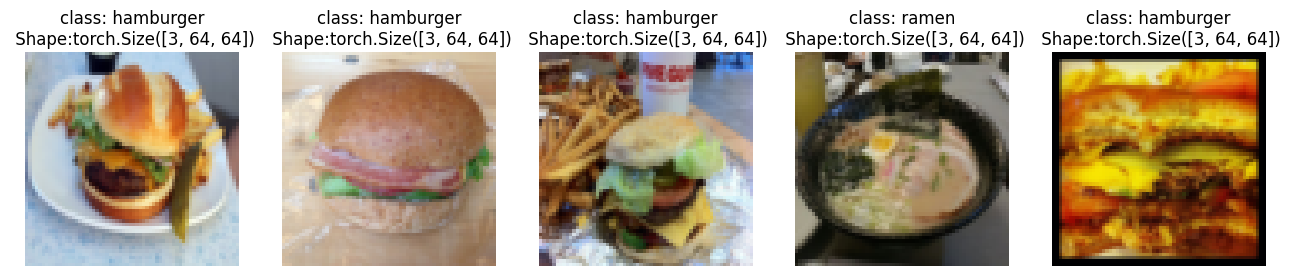

In [36]:
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      display_shape=True,
                      seed=None)

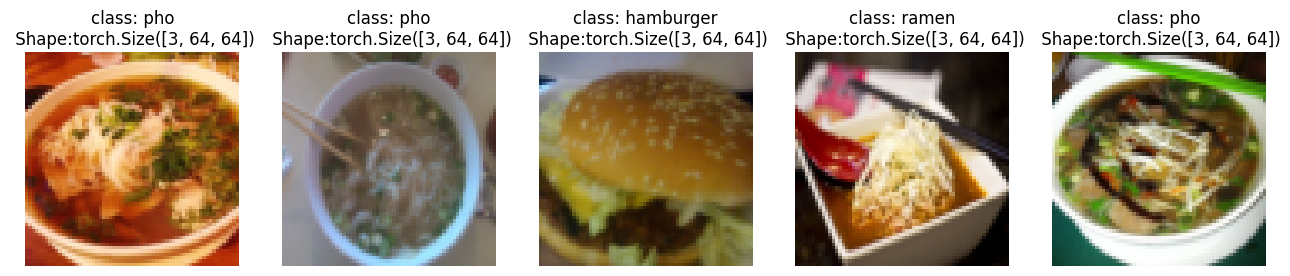

In [37]:
display_random_images(train_data_custom,
                      classes=class_names,
                      n=5,
                      display_shape=True,
                      seed=None)

For display, n shouldn't larger than 10


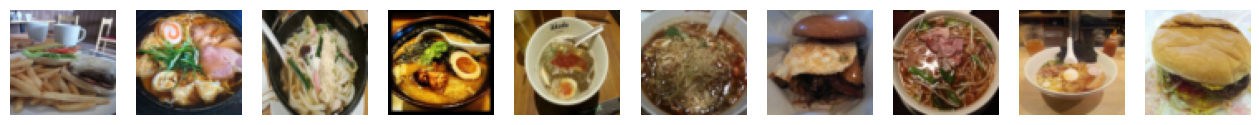

In [38]:
display_random_images(train_data_custom,
                      classes=class_names,
                      n=15,
                      display_shape=True,
                      seed=None)


In [39]:
train_dataloader_custom=DataLoader(dataset=train_data_custom,
                                   batch_size=1,
                                   num_workers=0,
                                   shuffle=True)

test_dataloader_custom=DataLoader(dataset=test_data_custom,
                                  batch_size=1,
                                  num_workers=0,
                                  shuffle=False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x79ddb50224d0>,
 <torch.utils.data.dataloader.DataLoader at 0x79ddb5022530>)

In [40]:
img_custom, label_custom=next(iter(train_dataloader_custom))
img_custom.shape, label_custom.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [41]:
from torchvision import transforms

train_transforms=transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms=transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

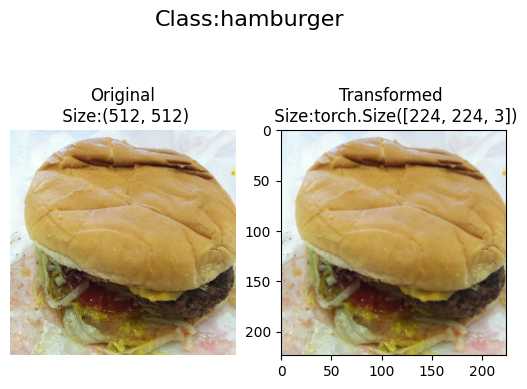

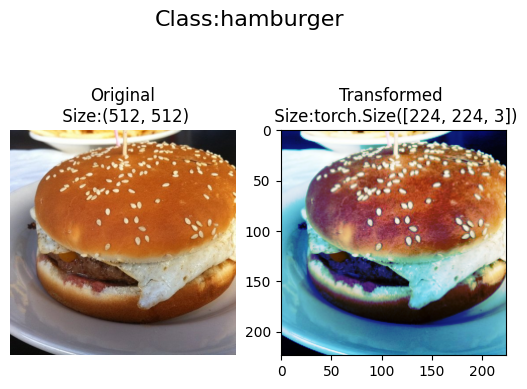

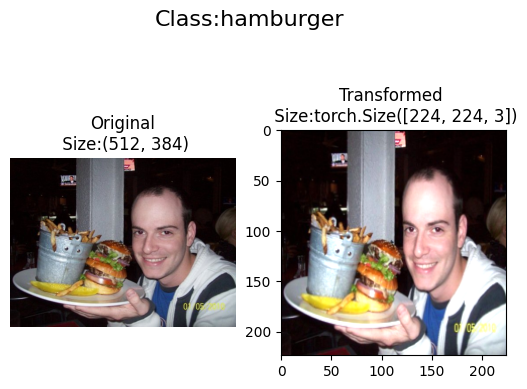

In [42]:
plot_transformed_images(image_paths=image_path_list,
                        transform=train_transforms,
                        n=3,
                        seed=None)

In [43]:
simple_transform=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [44]:
from torchvision import datasets

train_data_simple=datasets.ImageFolder(root=train_dir,
                                       transform=simple_transform)

test_data_simple=datasets.ImageFolder(root=test_dir,
                                       transform=simple_transform)

train_data_simple, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pho_ramen_hamburger/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pho_ramen_hamburger/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [45]:
import os
from torch.utils.data import dataloader

BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

train_dataloader_simple=DataLoader(dataset=train_data_simple,
                                   batch_size=BATCH_SIZE,
                                   num_workers=NUM_WORKERS,
                                   shuffle=True)

test_dataloader_simple=DataLoader(dataset=test_data_simple,
                                  batch_size=BATCH_SIZE,
                                  num_workers=NUM_WORKERS,
                                  shuffle=False)

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x79ddb4cb9150>,
 <torch.utils.data.dataloader.DataLoader at 0x79ddb4cb93c0>)

In [46]:
os.cpu_count()

2

In [47]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()

    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*256,
                  out_features=output_shape)
    )

  def forward(self,x):
    x=self.conv_block_1(x)
    x=self.conv_block_2(x)
    x=self.classifier(x)
    return x

In [48]:
torch.manual_seed(42)

model_0=TinyVGG(input_shape=3,
                hidden_units=10,
                output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [49]:
img_batch, label_batch=next(iter(train_dataloader_simple))
img_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [50]:
img_batch[0].unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [51]:
img_batch[0].shape, label_batch[0]

(torch.Size([3, 64, 64]), tensor(2))

In [52]:
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
img_single=img_single.to(device)
img_single.shape

torch.Size([1, 3, 64, 64])

In [53]:
model_0.eval()
with torch.inference_mode():
  pred=model_0(img_single)

print(pred)
print(torch.softmax(pred, dim=1))
print(torch.argmax(torch.softmax(pred, dim=1), dim=1))

tensor([[0.0632, 0.0623, 0.0384]], device='cuda:0')
tensor([[0.3362, 0.3359, 0.3279]], device='cuda:0')
tensor([0], device='cuda:0')


In [54]:
try:
  import torchinfo

except:
  !pip install torchinfo
  import torchinfo

In [55]:
from torchinfo import summary

summary(model_0, input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [56]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc


In [57]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [58]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [59]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1071 | train_acc: 0.2617 | test_loss: 1.1353 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0843 | train_acc: 0.4258 | test_loss: 1.1646 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1176 | train_acc: 0.2930 | test_loss: 1.1724 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0957 | train_acc: 0.4141 | test_loss: 1.1406 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0975 | train_acc: 0.2930 | test_loss: 1.1396 | test_acc: 0.1979
Total training time: 13.914 seconds


In [60]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

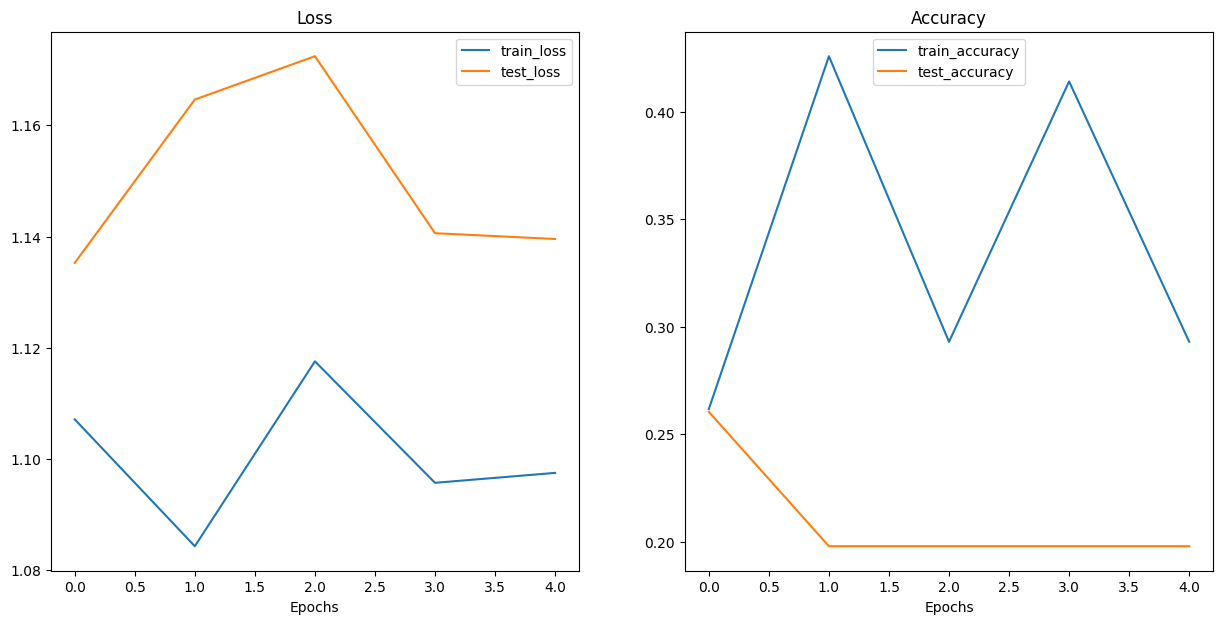

In [61]:
plot_loss_curves(model_0_results)

In [62]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [63]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pho_ramen_hamburger/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pho_ramen_hamburger/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [64]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79dd8c483940>,
 <torch.utils.data.dataloader.DataLoader at 0x79ddb5c8b790>)

In [65]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [66]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2461 | test_loss: 1.1060 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0796 | train_acc: 0.4258 | test_loss: 1.1371 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0812 | train_acc: 0.4258 | test_loss: 1.1690 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1289 | train_acc: 0.3047 | test_loss: 1.1630 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0908 | train_acc: 0.4258 | test_loss: 1.1477 | test_acc: 0.2604
Total training time: 8.726 seconds


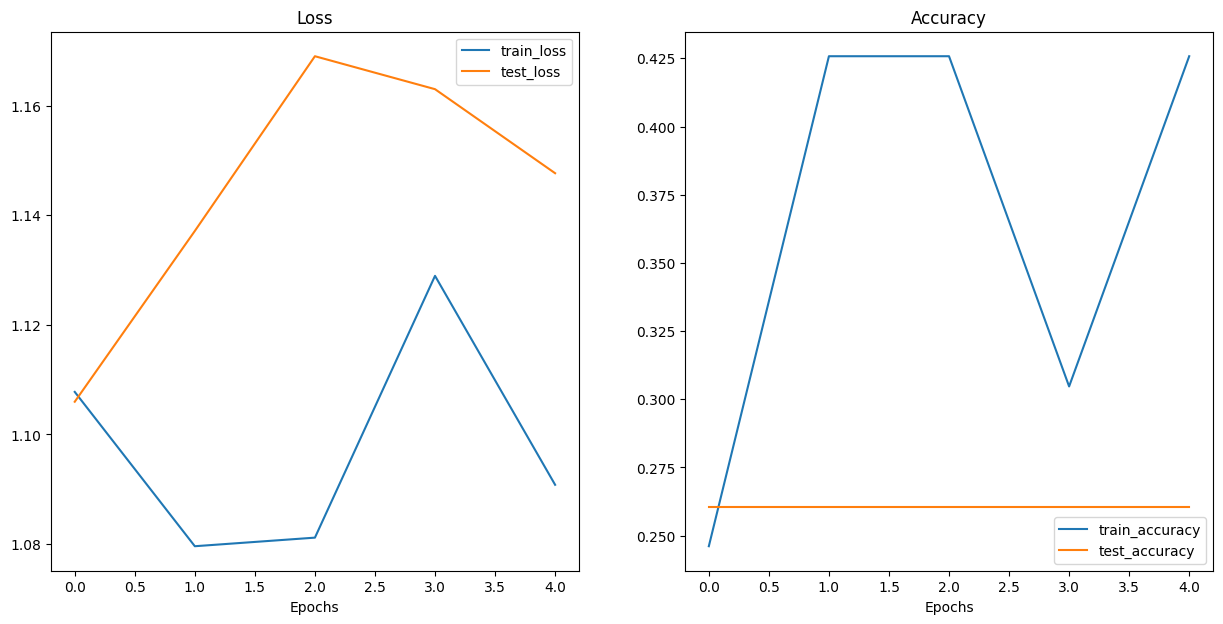

In [67]:
plot_loss_curves(model_1_results)

In [68]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.107135,0.261719,1.135272,0.260417
1,1.084326,0.425781,1.164641,0.197917
2,1.117566,0.292969,1.172428,0.197917
3,1.095727,0.414062,1.140609,0.197917
4,1.097512,0.292969,1.139565,0.197917


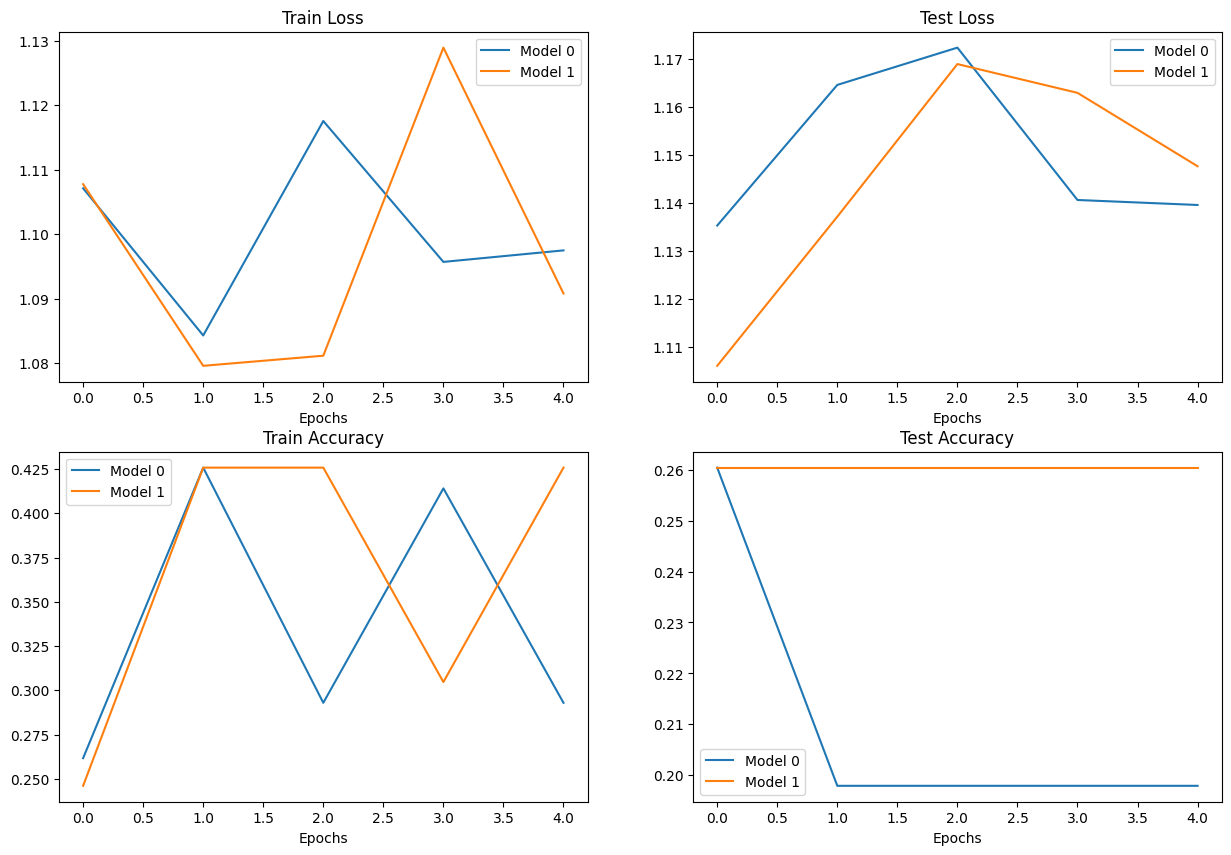

In [69]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

In [71]:
import torchvision

s="/content/data/images.jpeg"
custom_image_uint8=torchvision.io.read_image(custom_image_path)

print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[206, 206, 205,  ..., 192, 192, 192],
         [206, 206, 205,  ..., 192, 192, 192],
         [206, 205, 205,  ..., 192, 192, 192],
         ...,
         [246, 246, 246,  ..., 243, 243, 243],
         [246, 246, 246,  ..., 243, 243, 243],
         [246, 246, 246,  ..., 243, 243, 243]],

        [[190, 190, 189,  ..., 175, 175, 175],
         [190, 190, 189,  ..., 175, 175, 175],
         [190, 189, 189,  ..., 175, 175, 175],
         ...,
         [247, 247, 247,  ..., 244, 244, 244],
         [247, 247, 247,  ..., 244, 244, 244],
         [247, 247, 247,  ..., 244, 244, 244]],

        [[175, 175, 174,  ..., 157, 157, 157],
         [175, 175, 174,  ..., 157, 157, 157],
         [175, 174, 174,  ..., 157, 157, 157],
         ...,
         [252, 252, 252,  ..., 249, 249, 249],
         [252, 252, 252,  ..., 249, 249, 249],
         [252, 252, 252,  ..., 249, 249, 249]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 183, 275])

Custom image dtype

In [72]:
custom_image=custom_image_uint8.type(torch.float32)/255

print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")



Custom image tensor:
tensor([[[0.8078, 0.8078, 0.8039,  ..., 0.7529, 0.7529, 0.7529],
         [0.8078, 0.8078, 0.8039,  ..., 0.7529, 0.7529, 0.7529],
         [0.8078, 0.8039, 0.8039,  ..., 0.7529, 0.7529, 0.7529],
         ...,
         [0.9647, 0.9647, 0.9647,  ..., 0.9529, 0.9529, 0.9529],
         [0.9647, 0.9647, 0.9647,  ..., 0.9529, 0.9529, 0.9529],
         [0.9647, 0.9647, 0.9647,  ..., 0.9529, 0.9529, 0.9529]],

        [[0.7451, 0.7451, 0.7412,  ..., 0.6863, 0.6863, 0.6863],
         [0.7451, 0.7451, 0.7412,  ..., 0.6863, 0.6863, 0.6863],
         [0.7451, 0.7412, 0.7412,  ..., 0.6863, 0.6863, 0.6863],
         ...,
         [0.9686, 0.9686, 0.9686,  ..., 0.9569, 0.9569, 0.9569],
         [0.9686, 0.9686, 0.9686,  ..., 0.9569, 0.9569, 0.9569],
         [0.9686, 0.9686, 0.9686,  ..., 0.9569, 0.9569, 0.9569]],

        [[0.6863, 0.6863, 0.6824,  ..., 0.6157, 0.6157, 0.6157],
         [0.6863, 0.6863, 0.6824,  ..., 0.6157, 0.6157, 0.6157],
         [0.6863, 0.6824, 0.6824,  ..

(-0.5, 274.5, 182.5, -0.5)

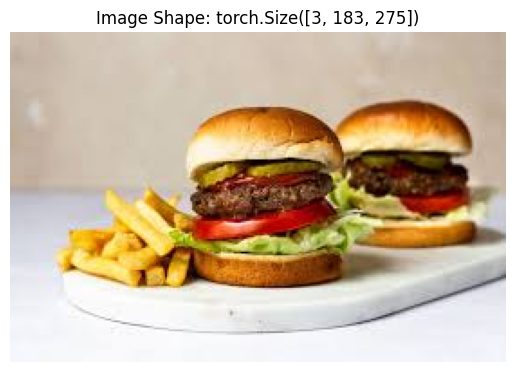

In [73]:
plt.imshow(custom_image.permute(1,2,0))

plt.title(f"Image Shape: {custom_image.shape}")

plt.axis(False)

In [74]:
custom_image_transform=transforms.Compose([
    transforms.Resize(size=(64,64))
])

custom_image_transformed=custom_image_transform(custom_image)

print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 183, 275])
New shape: torch.Size([3, 64, 64])


In [75]:
custom_image_transformed=custom_image_transformed.unsqueeze(dim=0)

model_1.eval()
with torch.inference_mode():
  custom_image_pred=model_1(custom_image_transformed.to(device))



In [76]:
custom_image_pred

tensor([[ 0.1164,  0.0352, -0.1478]], device='cuda:0')

In [77]:
custom_image_pred_label=torch.argmax(torch.softmax(custom_image_pred, dim=1), dim=1)
custom_image_pred_label

tensor([0], device='cuda:0')

In [79]:
custom_image_pred_class=class_names[custom_image_pred_label.cpu()]
custom_image_pred_class

'hamburger'

In [80]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path:str,
                        class_names: List[str],
                        transform=None,
                        device: torch.device=device):

  target_image=torchvision.io.read_image(str(image_path)).type(torch.float32)/255

  if transform:
    target_image=transform(target_image)

  model.to(device)
  model.eval()
  with torch.inference_mode():
    target_image=target_image.unsqueeze(dim=0)
    target_image_pred=model(target_image.to(device))

  target_image_label=torch.argmax(torch.softmax(target_image_pred, dim=1), dim=1)

  plt.imshow(target_image.squeeze().permute(1,2,0))

  if class_names:
    title=f"Pred:{class_names[target_image_label]}"
  else:
    title=f"Pred:{target_iamge_label}"
  plt.title(title)
  plt.axis(False)


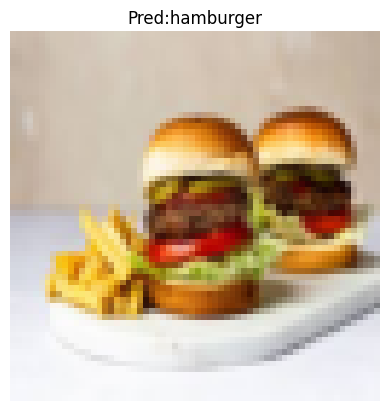

In [81]:
pred_and_plot_image(model=model_1,
                    image_path="/content/data/images.jpeg",
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

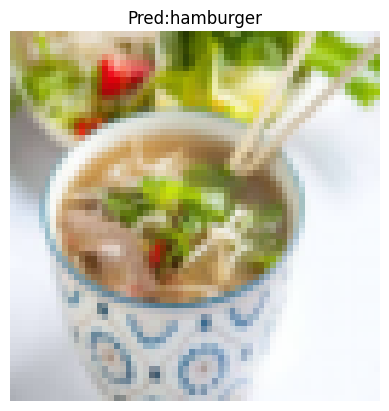

In [82]:
pred_and_plot_image(model=model_1,
                    image_path="/content/data/download.jpeg",
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

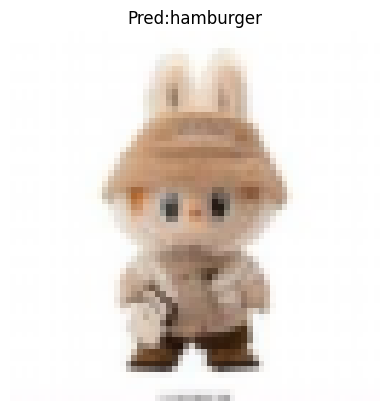

In [83]:
pred_and_plot_image(model=model_1,
                    image_path="/content/data/Labubu.jpeg",
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)